# Using physical and image coordinate systems in SimpleITK

This notebook shows how to locate the same point in two different image volumes acquired during the same imaging session using the Simple ITK library. It assumes that the DICOM information on image origin, orientation and pixel spacing has been captured when the dicom images have been converted to .mha or nii format.

There is a good description of how DICOM stores information about patient orientaiton here:
http://nipy.org/nibabel/dicom/dicom_orientation.html

In the CT example here the image reconstruction results in image volumes where the seperation between slices is much greater than the pixel spacing within the recon plane. For this reason two series have been generated using different orientations. 



In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
import os

Import the two images. These must have been acquired during the same imaging session so that the DICOM physical frame is unchanged. Here 2 liver CT images are used as an example. One has been reconstructed in the axial plane and the other has been reconstructed in the coronal plane. 

In [2]:
ax_filename = os.path.join(os.getcwd() ,"example_data", "abdominalCT_axial.mha")
cor_filename = os.path.join(os.getcwd() ,"example_data", "abdominalCT_coronal.mha")
ax_volume=sitk.ReadImage(ax_filename)
cor_volume = sitk.ReadImage(cor_filename)

Note the difference in in-plane pixel spacing and through-plane pixel spacing:

In [3]:
print "Size of axial volume array: ",ax_volume.GetSize()
print "pixels spacing for axial volume: ",ax_volume.GetSpacing()
print "Size of coronal volume array: ",cor_volume.GetSize()
print "pixels spacing for coronal volume: ",cor_volume.GetSpacing()

Size of axial volume array:  (512, 512, 168)
pixels spacing for axial volume:  (0.7260000109672546, 0.7260000109672546, 2.5)
Size of coronal volume array:  (576, 576, 104)
pixels spacing for coronal volume:  (0.7260000109672546, 0.7260000109672546, 3.0)


#### Displaying 3 orthogonal slices from the axial volume corresponding to an arbitrary point defined by ax_coords.

The aspect ratio is set using the pixel spacing information and the coronal and sagittal views are interpolated.

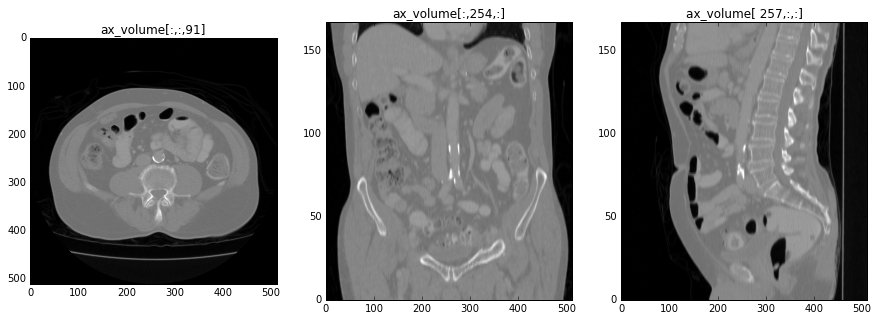

In [4]:
ax_imag_coords=[257,254,91]
ldisp = -1000
udisp = 1000
spacing=ax_volume.GetSpacing()

fig=plt.figure(figsize=[15,5])
fig.add_subplot(1,3,1)
aspect = spacing[1]/spacing[0]
imshow(sitk.GetArrayFromImage(ax_volume[:,:,ax_imag_coords[2]]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect)
plt.title('ax_volume[:,:,'  + str(ax_imag_coords[2]) +']')

fig.add_subplot(1,3,2)
aspect = spacing[2]/spacing[0]
imshow(sitk.GetArrayFromImage(ax_volume[:,ax_imag_coords[1],:]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect,origin='lower')
plt.title('ax_volume[:,'  + str(ax_imag_coords[1]) +',:]')

fig.add_subplot(1,3,3)
aspect = spacing[2]/spacing[1]
imshow(sitk.GetArrayFromImage(ax_volume[ax_imag_coords[0],:,:]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect, origin='lower')
plt.title('ax_volume[ '+str(ax_imag_coords[0]) +',:,:]')


Now show sections through same image coordinates in coronal image - note that thee do not correspond to same physical location. This time the axial and sagittal images have been interpolated.

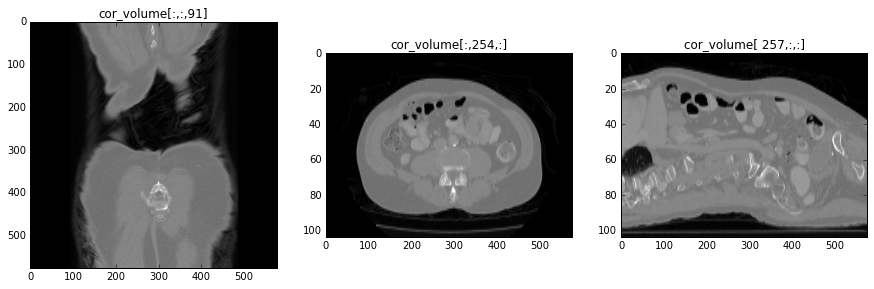

In [5]:

spacing=cor_volume.GetSpacing()

fig=plt.figure(figsize=[15,5])
fig.add_subplot(1,3,1)
aspect = spacing[1]/spacing[0]
imshow(sitk.GetArrayFromImage(cor_volume[:,:,ax_imag_coords[2]]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect)
plt.title('cor_volume[:,:,'  + str(ax_imag_coords[2]) +']')

fig.add_subplot(1,3,2)
aspect = spacing[2]/spacing[0]
imshow(sitk.GetArrayFromImage(cor_volume[:,ax_imag_coords[1],:]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect)
plt.title('cor_volume[:,'  + str(ax_imag_coords[1]) +',:]')

fig.add_subplot(1,3,3)
aspect = spacing[2]/spacing[1]
imshow(sitk.GetArrayFromImage(cor_volume[ax_imag_coords[0],:,:]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect)
plt.title('cor_volume[ '+str(ax_imag_coords[0]) +',:,:]')

#### The physical coordinates can be derived from the origin, direction and spacing information.

See http://nipy.org/nibabel/dicom/dicom_orientation.html for a full definition.

In [6]:
print 'origin: ax: ',ax_volume.GetOrigin()
print 'origin: cor: ',cor_volume.GetOrigin()

origin: ax:  (-185.938, -185.938, 1220.0)
origin: cor:  (-209.17, -153.495, 1637.47)


In [7]:
print 'direction: ax: ',ax_volume.GetDirection()
print 'direction: cor: ',cor_volume.GetDirection()

direction: ax:  (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
direction: cor:  (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, -1.0, 0.0)


#### Mapping coords from axial image to physical space:  

In [8]:
physical_coords = ax_volume.TransformIndexToPhysicalPoint(ax_imag_coords)
print physical_coords

(0.644002818584454, -1.53399721431731, 1447.5)


Then map from physical to coronal image coords and show the coroonal volume centred on the coordinated that correspond to the axial slices shown above.

In [9]:
cor_imag_coords = cor_volume.TransformPhysicalPointToIndex(physical_coords)
print cor_imag_coords

(289L, 262L, 51L)


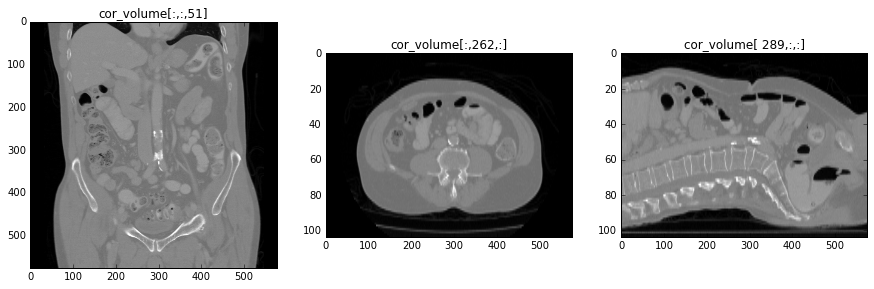

In [10]:
spacing=cor_volume.GetSpacing()

fig=plt.figure(figsize=[15,5])
fig.add_subplot(1,3,1)
aspect = spacing[1]/spacing[0]
imshow(sitk.GetArrayFromImage(cor_volume[:,:,cor_imag_coords[2]]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect)
plt.title('cor_volume[:,:,'  + str(cor_imag_coords[2]) +']')

fig.add_subplot(1,3,2)
aspect = spacing[2]/spacing[0]
imshow(sitk.GetArrayFromImage(cor_volume[:,cor_imag_coords[1],:]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect)
plt.title('cor_volume[:,'  + str(cor_imag_coords[1]) +',:]')

fig.add_subplot(1,3,3)
aspect = spacing[2]/spacing[1]
imshow(sitk.GetArrayFromImage(cor_volume[cor_imag_coords[0],:,:]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect)
plt.title('cor_volume[ '+str(cor_imag_coords[0]) +',:,:]')

#### Now look at zoomed in images to see how the resolution is better for the inplane images compared to the resliced images.

The coordinates for a 10cm box centred around the point are caclulated in physical space and then converted to image space for both the axial and coronal volumes. NB this code does not check that box lies within the image extent - it will crash if the bonding box goes out of the range.

In [11]:

ax_spacing = ax_volume.GetSpacing()
cor_spacing = cor_volume.GetSpacing()

# dicom coords are defined in mm
lower_physical_coords=physical_coords-np.array([50,50,50])
upper_physical_coords=physical_coords+np.array([50,50,50])

lower_ax_coords = ax_volume.TransformPhysicalPointToIndex(lower_physical_coords)
upper_ax_coords = ax_volume.TransformPhysicalPointToIndex(upper_physical_coords)   
lower_cor_coords = cor_volume.TransformPhysicalPointToIndex(lower_physical_coords)
upper_cor_coords = cor_volume.TransformPhysicalPointToIndex(upper_physical_coords)   

print lower_ax_coords
print upper_ax_coords

(188L, 185L, 71L)
(326L, 323L, 111L)


Display the images within this bounding box.  Interpolation has been set to none to make the difference in resolution more readily apparent.

No interpolation between slices has been carried out here so it is possible that the slices do not align exactly.

(220.0, 358.0, 331.0, 193.0)

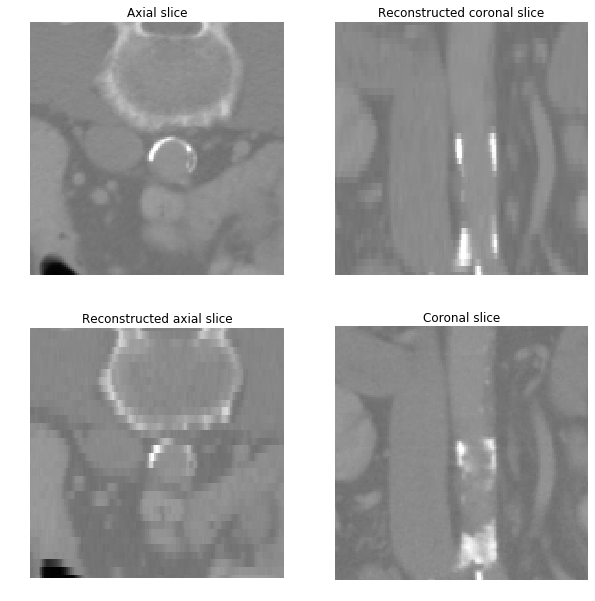

In [12]:
#plot images from axial reconstruction first
fig=plt.figure(figsize=[10,10])
axes=fig.add_subplot(2,2,1)
aspect = ax_spacing[1]/ax_spacing[0]
axes.imshow(sitk.GetArrayFromImage(ax_volume[:,:,ax_imag_coords[2]]),
       cmap='gray', vmax=udisp,vmin=ldisp,
       aspect=aspect,interpolation='none')
axes.set_xlim(lower_ax_coords[0],upper_ax_coords[0])
axes.set_ylim(lower_ax_coords[1],upper_ax_coords[1])
axes.set_title('Axial slice')
plt.axis('off')

axes=fig.add_subplot(2,2,2)
aspect = ax_spacing[2]/ax_spacing[0]
axes.imshow(sitk.GetArrayFromImage(ax_volume[:,ax_imag_coords[1],:]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect,
       interpolation='none',origin='lower')
axes.set_xlim(lower_ax_coords[0],upper_ax_coords[0])
axes.set_ylim(lower_ax_coords[2],upper_ax_coords[2])
axes.set_title('Reconstructed coronal slice')
plt.axis('off')

#now plot images from coronal reconstruction 
axes=fig.add_subplot(2,2,3)
aspect = cor_spacing[2]/cor_spacing[0]
axes.imshow(sitk.GetArrayFromImage(cor_volume[:,cor_imag_coords[1],:]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect,
       interpolation='none')
axes.set_xlim(lower_cor_coords[0],upper_cor_coords[0])
axes.set_ylim(lower_cor_coords[2],upper_cor_coords[2])
axes.set_title('Reconstructed axial slice')
plt.axis('off')

axes=fig.add_subplot(2,2,4)
aspect = cor_spacing[1]/cor_spacing[0]
axes.imshow(sitk.GetArrayFromImage(cor_volume[:,:,cor_imag_coords[2]]),
       cmap='gray', vmax=udisp,vmin=ldisp,aspect=aspect,
       interpolation='none')
axes.set_xlim(lower_cor_coords[0],upper_cor_coords[0])
axes.set_ylim(lower_cor_coords[1],upper_cor_coords[1])
axes.set_title('Coronal slice')
plt.axis('off')